In [61]:
# Portfolio Analysis and Efficient Frontier Simulation
# ====================================================

# ## 1. Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yf
from datetime import datetime as dt
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
np.random.seed(42)  # For reproducible results

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Define Portfolio Parameters


In [62]:
# ✅ IMPROVEMENT 2: Expanded Asset Universe - More diversified portfolio
assets = [
    'SPY',  # S&P 500 (US Large Cap)
    'QQQ',  # NASDAQ 100 (US Tech)
    'IWM',  # Russell 2000 (US Small Cap)
    'EFA',  # MSCI EAFE (International Developed)
    'EEM',  # MSCI Emerging Markets
    'VNQ',  # REITs (Real Estate)
    'GLD',  # Gold (Commodities)
    'BND'   # US Total Bond Market
]

asset_names = {
    'SPY': 'S&P 500',
    'QQQ': 'NASDAQ 100', 
    'IWM': 'Small Cap',
    'EFA': 'Int\'l Developed',
    'EEM': 'Emerging Markets',
    'VNQ': 'REITs',
    'GLD': 'Gold',
    'BND': 'Bonds'
}

# ✅ IMPROVEMENT 1: Risk-Free Rate Integration
# Get current 10-year Treasury rate (approximate)
RISK_FREE_RATE = 0.045  # 4.5% annual - update this with current rate
print(f"🏦 Risk-Free Rate (10Y Treasury): {RISK_FREE_RATE:.1%}")

start = dt(2015, 1, 1)  # Extended period for more data
end = dt.now()

print(f"🎯 Portfolio Assets ({len(assets)}): {', '.join(assets)}")
print(f"📅 Analysis Period: {start.strftime('%Y-%m-%d')} to {end.strftime('%Y-%m-%d')}")

🏦 Risk-Free Rate (10Y Treasury): 4.5%
🎯 Portfolio Assets (8): SPY, QQQ, IWM, EFA, EEM, VNQ, GLD, BND
📅 Analysis Period: 2015-01-01 to 2025-09-07


## 3. Data Collection and Preprocessing

In [63]:
print("Downloading historical price data for expanded universe...")

try:
    # Download data using yfinance with progress bar
    data = yf.download(assets, start=start, end=end, progress=True)

    # Handle MultiIndex columns
    if data.columns.nlevels > 1:
        pf_data = data['Close']  # Use Adjusted Close for better accuracy
    else:
        pf_data = data

    # Clean data and handle missing values
    print(f"Initial data shape: {pf_data.shape}")
    
    # Check for missing data
    missing_data = pf_data.isnull().sum()
    if missing_data.sum() > 0:
        print("Missing data detected:")
        print(missing_data[missing_data > 0])
    
    # Drop any rows with missing data
    pf_data = pf_data.dropna()
    
    print(f"✅ Final data shape: {pf_data.shape}")
    print(f"✅ Period: {pf_data.index[0].strftime('%Y-%m-%d')} to {pf_data.index[-1].strftime('%Y-%m-%d')}")

except Exception as e:
    print(f"❌ Error downloading data: {e}")
    # Fallback to smaller universe
    assets = ['SPY', 'BND', 'GLD', 'EFA']
    print(f"Falling back to: {assets}")
    data = yf.download(assets, start=start, end=end)
    pf_data = data['Close'] if data.columns.nlevels > 1 else data
    pf_data = pf_data.dropna()

[*********************100%***********************]  8 of 8 completed

Initial data shape: (2685, 8)
✅ Final data shape: (2685, 8)
✅ Period: 2015-01-02 to 2025-09-05


## 4. Data Overview

In [64]:
print("\n=== ENHANCED DATA SUMMARY ===")
print(f"Assets: {len(pf_data.columns)}")
print(f"Trading Days: {len(pf_data)}")
print(f"Years: {(pf_data.index[-1] - pf_data.index[0]).days / 365.25:.1f}")

# Display price ranges
price_summary = pd.DataFrame({
    'Asset': [asset_names.get(asset, asset) for asset in pf_data.columns],
    'Start Price': pf_data.iloc[0].round(2),
    'End Price': pf_data.iloc[-1].round(2),
    'Min Price': pf_data.min().round(2),
    'Max Price': pf_data.max().round(2)
}, index=pf_data.columns)

print("\nPrice Summary:")
price_summary


=== ENHANCED DATA SUMMARY ===
Assets: 8
Trading Days: 2685
Years: 10.7

Price Summary:


,Asset,Start Price,End Price,Min Price,Max Price
Ticker,,,,,
BND,Bonds,61.18,74.27,60.48,77.06
EEM,Emerging Markets,30.79,50.45,22.95,52.31
EFA,Int'l Developed,44.57,91.79,38.78,93.23
GLD,Gold,114.08,331.05,100.50,331.05
IWM,Small Cap,103.61,237.77,83.78,240.48
QQQ,NASDAQ 100,95.02,576.06,89.81,580.34
SPY,S&P 500,171.57,647.24,155.87,649.12
VNQ,REITs,54.11,92.47,46.57,100.99


## 5. Price Performance Visualization

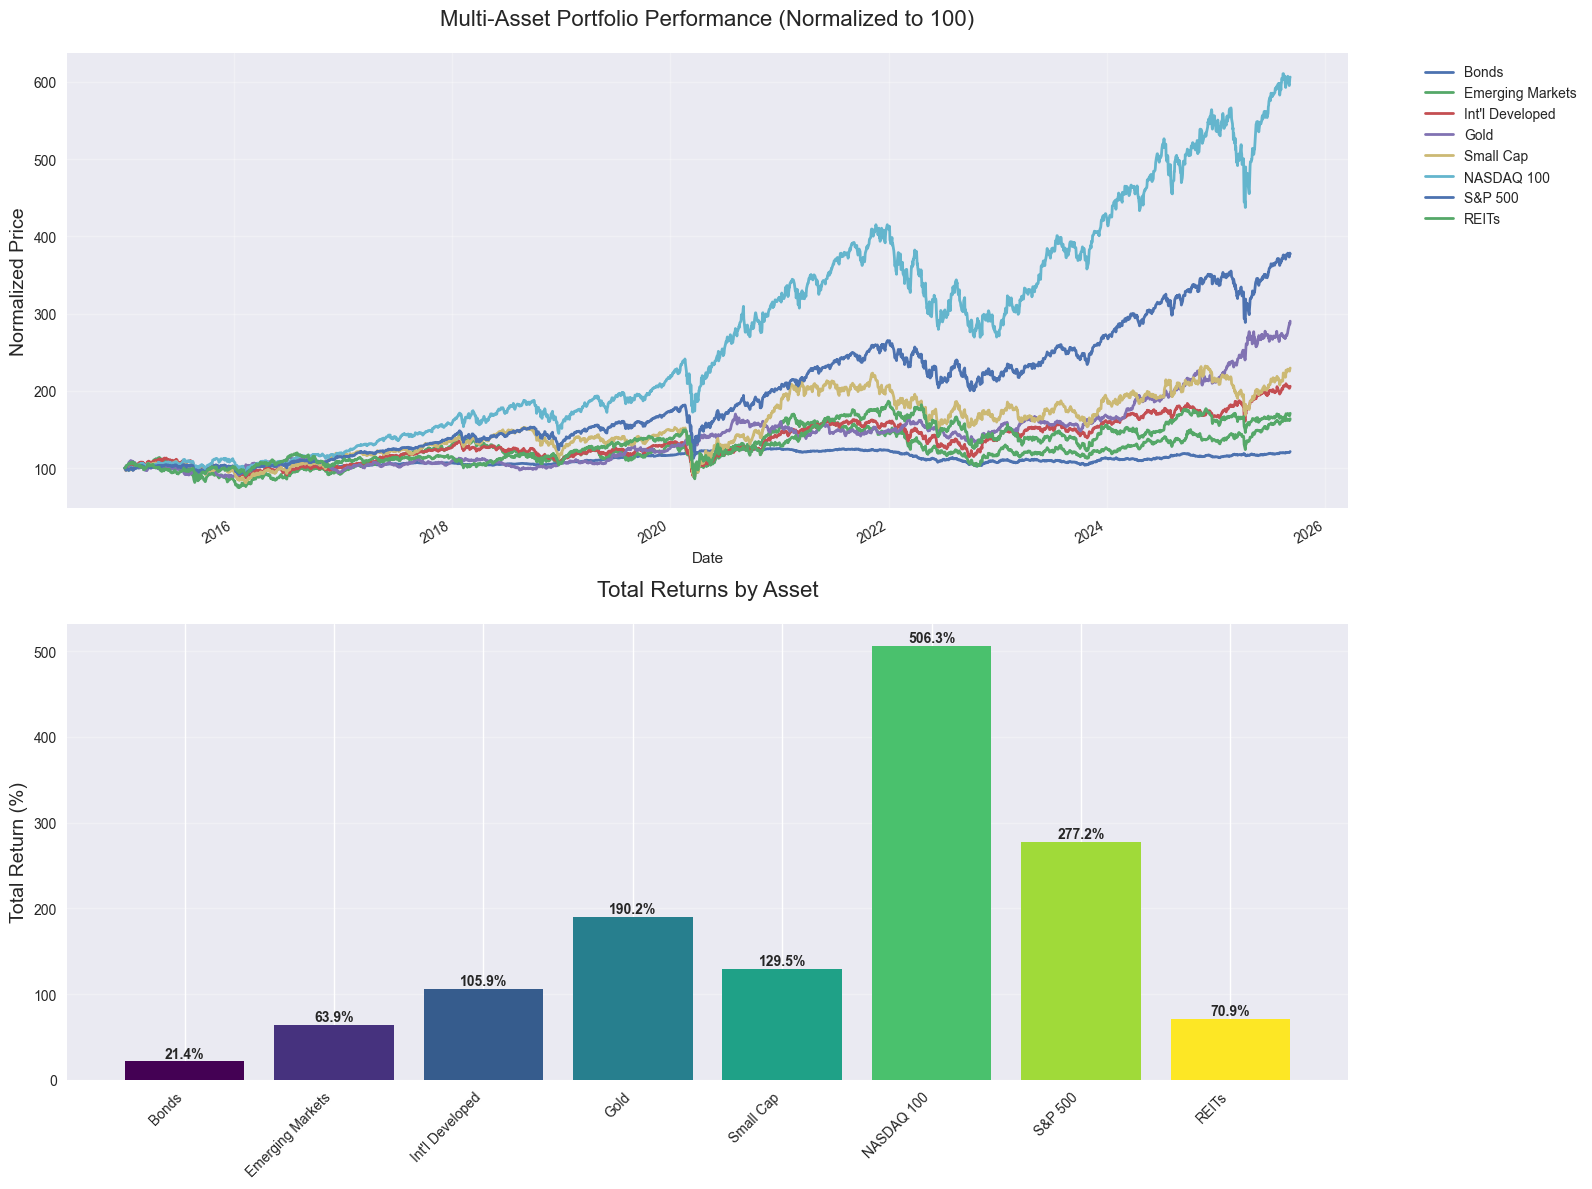

Total Returns over the period:
  Bonds          :   21.4%
  Emerging Markets:   63.9%
  Int'l Developed:  105.9%
  Gold           :  190.2%
  Small Cap      :  129.5%
  NASDAQ 100     :  506.3%
  S&P 500        :  277.2%
  REITs          :   70.9%


In [65]:
# Create a more comprehensive performance chart
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

# Normalize prices to 100 for comparison
normalized_prices = pf_data / pf_data.iloc[0] * 100

# Main performance chart
normalized_prices.plot(ax=ax1, linewidth=2)
ax1.set_title('Multi-Asset Portfolio Performance (Normalized to 100)', fontsize=16, pad=20)
ax1.set_ylabel('Normalized Price', fontsize=14)
ax1.legend([asset_names.get(col, col) for col in pf_data.columns], 
           bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, alpha=0.3)

# Calculate total returns for the period
total_returns = (pf_data.iloc[-1] / pf_data.iloc[0] - 1) * 100

# Bar chart of total returns
colors = plt.cm.viridis(np.linspace(0, 1, len(assets)))
bars = ax2.bar(range(len(total_returns)), total_returns.values, color=colors)
ax2.set_title('Total Returns by Asset', fontsize=16, pad=20)
ax2.set_ylabel('Total Return (%)', fontsize=14)
ax2.set_xticks(range(len(total_returns)))
ax2.set_xticklabels([asset_names.get(asset, asset) for asset in total_returns.index], 
                    rotation=45, ha='right')
ax2.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, total_returns.values)):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("Total Returns over the period:")
for asset in pf_data.columns:
    print(f"  {asset_names.get(asset, asset):15}: {total_returns[asset]:6.1f}%")

## 6. Calculate Returns and Risk Metrics

In [66]:
# Calculate daily log returns
log_returns = np.log(pf_data / pf_data.shift(1)).dropna()

print(f"\nReturns calculated: {len(log_returns)} trading days")
print("Daily Log Returns Summary (last 5 days):")
log_returns.tail().round(4)



Returns calculated: 2684 trading days
Daily Log Returns Summary (last 5 days):


Ticker,BND,EEM,EFA,GLD,IWM,QQQ,SPY,VNQ
Date,,,,,,,,
2025-08-29,-0.0012,-0.0048,-0.0059,0.0096,-0.0045,-0.0116,-0.0060,0.0054
2025-09-02,-0.0021,-0.0008,-0.0099,0.0234,-0.0054,-0.0084,-0.0074,-0.0167
2025-09-03,0.0033,0.0038,0.0015,0.0078,-0.0010,0.0078,0.0054,0.0006
2025-09-04,0.0038,-0.0032,0.0072,-0.0044,0.0124,0.0090,0.0083,0.0075
2025-09-05,0.0047,0.0120,0.0045,0.0133,0.0050,0.0014,-0.0029,0.0112


## 7. Enhanced Risk-Return Metrics with Risk-Free Rate

In [67]:
# Calculate annualized metrics (252 trading days per year - more accurate)
TRADING_DAYS = 252
annual_returns = log_returns.mean() * TRADING_DAYS
annual_volatility = log_returns.std() * np.sqrt(TRADING_DAYS)
annual_cov_matrix = log_returns.cov() * TRADING_DAYS

# ✅ IMPROVEMENT 1: Enhanced Sharpe Ratio with Risk-Free Rate
excess_returns = annual_returns - RISK_FREE_RATE
sharpe_ratios = excess_returns / annual_volatility

# Create enhanced summary table
enhanced_summary = pd.DataFrame({
    'Asset Name': [asset_names.get(asset, asset) for asset in pf_data.columns],
    'Annual Return': annual_returns.values,
    'Annual Volatility': annual_volatility.values,
    'Excess Return': excess_returns.values,
    'Sharpe Ratio': sharpe_ratios.values,
    'Total Return': total_returns.values / 100
}, index=pf_data.columns)

print("\n=== ENHANCED INDIVIDUAL ASSET METRICS ===")
print(f"Risk-Free Rate: {RISK_FREE_RATE:.1%}")
print("\nIndividual Asset Analysis:")

# Format for display
display_summary = enhanced_summary.copy()
for col in ['Annual Return', 'Annual Volatility', 'Excess Return', 'Total Return']:
    display_summary[col] = display_summary[col].map('{:.1%}'.format)
display_summary['Sharpe Ratio'] = display_summary['Sharpe Ratio'].map('{:.3f}'.format)

display_summary.round(4)


=== ENHANCED INDIVIDUAL ASSET METRICS ===
Risk-Free Rate: 4.5%

Individual Asset Analysis:


,Asset Name,Annual Return,Annual Volatility,Excess Return,Sharpe Ratio,Total Return
Ticker,,,,,,
BND,Bonds,1.8%,5.4%,-2.7%,-0.493,21.4%
EEM,Emerging Markets,4.6%,20.7%,0.1%,0.007,63.9%
EFA,Int'l Developed,6.8%,17.5%,2.3%,0.131,105.9%
GLD,Gold,10.0%,14.4%,5.5%,0.381,190.2%
IWM,Small Cap,7.8%,22.7%,3.3%,0.145,129.5%
QQQ,NASDAQ 100,16.9%,22.2%,12.4%,0.560,506.3%
SPY,S&P 500,12.5%,18.0%,8.0%,0.443,277.2%
VNQ,REITs,5.0%,20.9%,0.5%,0.025,70.9%


## 8. ✅ IMPROVEMENT 3: Drawdown Analysis



=== DRAWDOWN ANALYSIS ===


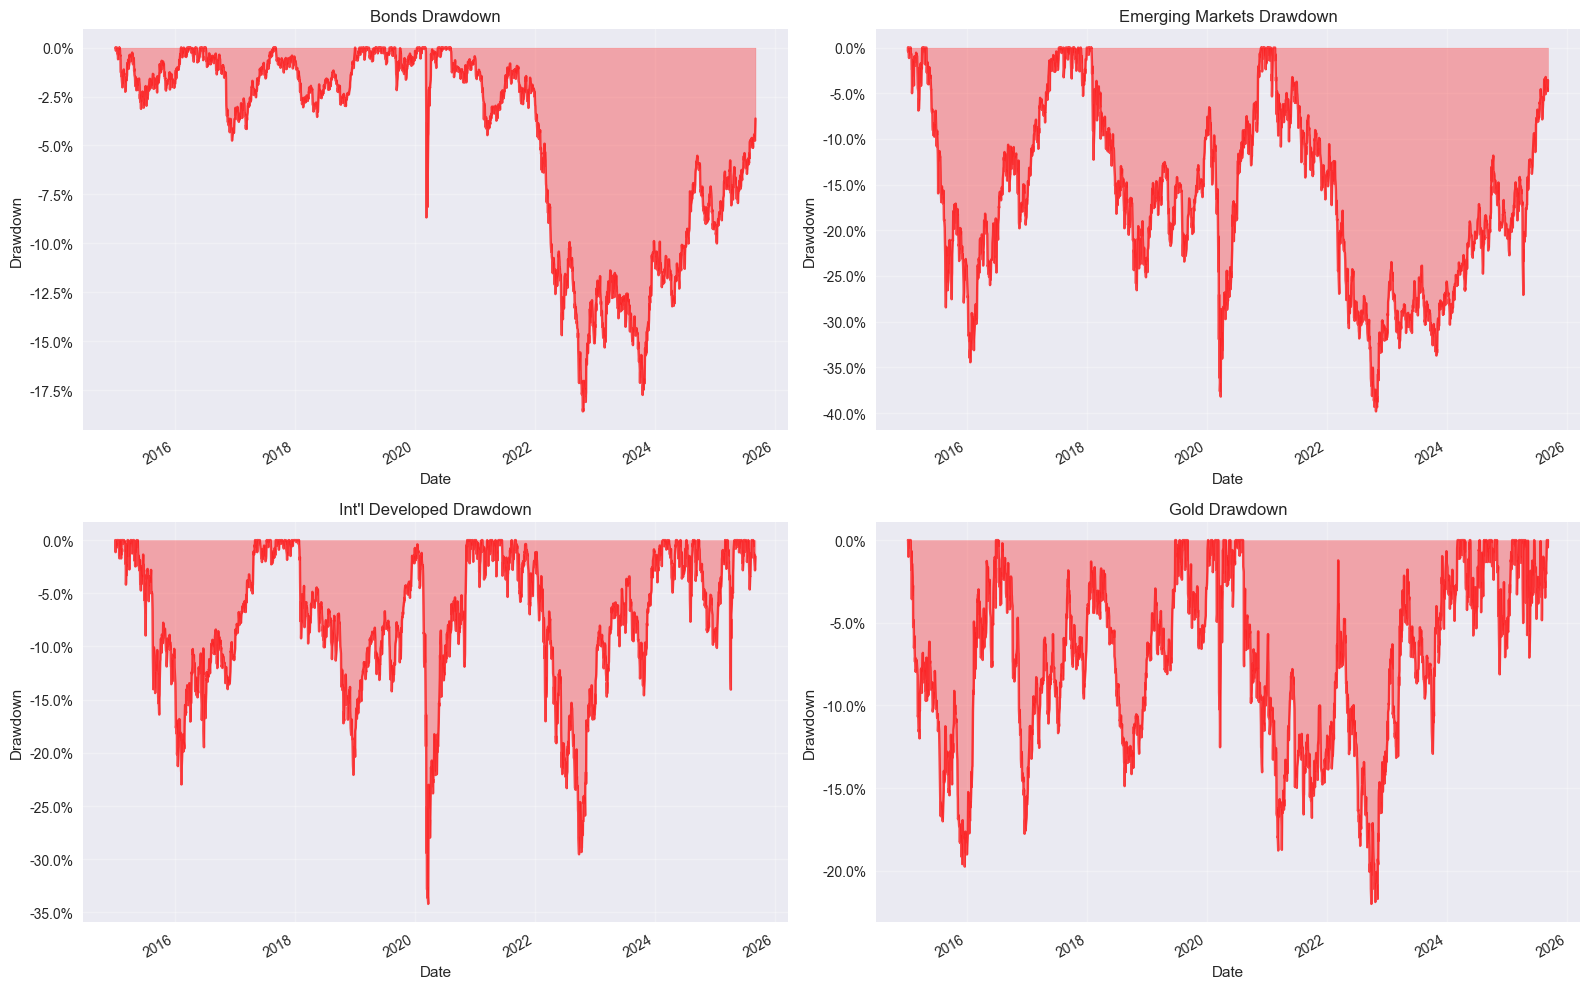

Maximum Drawdown Analysis:


,Asset,Max Drawdown,Max DD Duration (Days),Current Drawdown
0,Bonds,-0.1858,1276,-0.0363
1,Emerging Markets,-0.3982,1143,-0.0356
2,Int'l Developed,-0.3419,706,-0.0154
3,Gold,-0.2200,897,0.0000
4,Small Cap,-0.4113,752,-0.0113
5,NASDAQ 100,-0.3512,493,-0.0074
6,S&P 500,-0.3372,488,-0.0029
7,REITs,-0.4240,922,-0.0844


In [68]:
def calculate_drawdown(price_series):
    """Calculate drawdown and maximum drawdown"""
    # Calculate cumulative returns
    cumulative = (1 + price_series.pct_change()).cumprod()
    
    # Calculate running maximum
    running_max = cumulative.expanding().max()
    
    # Calculate drawdown
    drawdown = (cumulative - running_max) / running_max
    
    # Find maximum drawdown
    max_drawdown = drawdown.min()
    
    # Find drawdown duration
    drawdown_duration = 0
    current_duration = 0
    
    for dd in drawdown:
        if dd < 0:
            current_duration += 1
            drawdown_duration = max(drawdown_duration, current_duration)
        else:
            current_duration = 0
    
    return drawdown, max_drawdown, drawdown_duration

print("\n=== DRAWDOWN ANALYSIS ===")

# Calculate drawdowns for each asset
drawdown_summary = []

# Determine how many assets to plot (max 4 for readability)
available_assets = pf_data.columns.tolist()
assets_to_plot = min(4, len(available_assets))
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for i, asset in enumerate(available_assets[:assets_to_plot]):
    drawdown, max_dd, dd_duration = calculate_drawdown(pf_data[asset])
    
    drawdown_summary.append({
        'Asset': asset_names.get(asset, asset),
        'Max Drawdown': max_dd,
        'Max DD Duration (Days)': dd_duration,
        'Current Drawdown': drawdown.iloc[-1]
    })
    
    # Plot drawdown
    ax = axes[i]
    drawdown.plot(ax=ax, color='red', alpha=0.7)
    ax.fill_between(drawdown.index, drawdown, 0, alpha=0.3, color='red')
    ax.set_title(f'{asset_names.get(asset, asset)} Drawdown', fontsize=12)
    ax.set_ylabel('Drawdown')
    ax.grid(True, alpha=0.3)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.1%}'.format(y)))

# Hide unused subplots if we have fewer than 4 assets
for i in range(assets_to_plot, 4):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

# Complete drawdown analysis for remaining assets
for asset in available_assets[assets_to_plot:]:
    drawdown, max_dd, dd_duration = calculate_drawdown(pf_data[asset])
    drawdown_summary.append({
        'Asset': asset_names.get(asset, asset),
        'Max Drawdown': max_dd,
        'Max DD Duration (Days)': dd_duration,
        'Current Drawdown': drawdown.iloc[-1]
    })

drawdown_df = pd.DataFrame(drawdown_summary)
print("Maximum Drawdown Analysis:")
drawdown_df.round(4)

## 9. Correlation Analysis


=== CORRELATION ANALYSIS ===


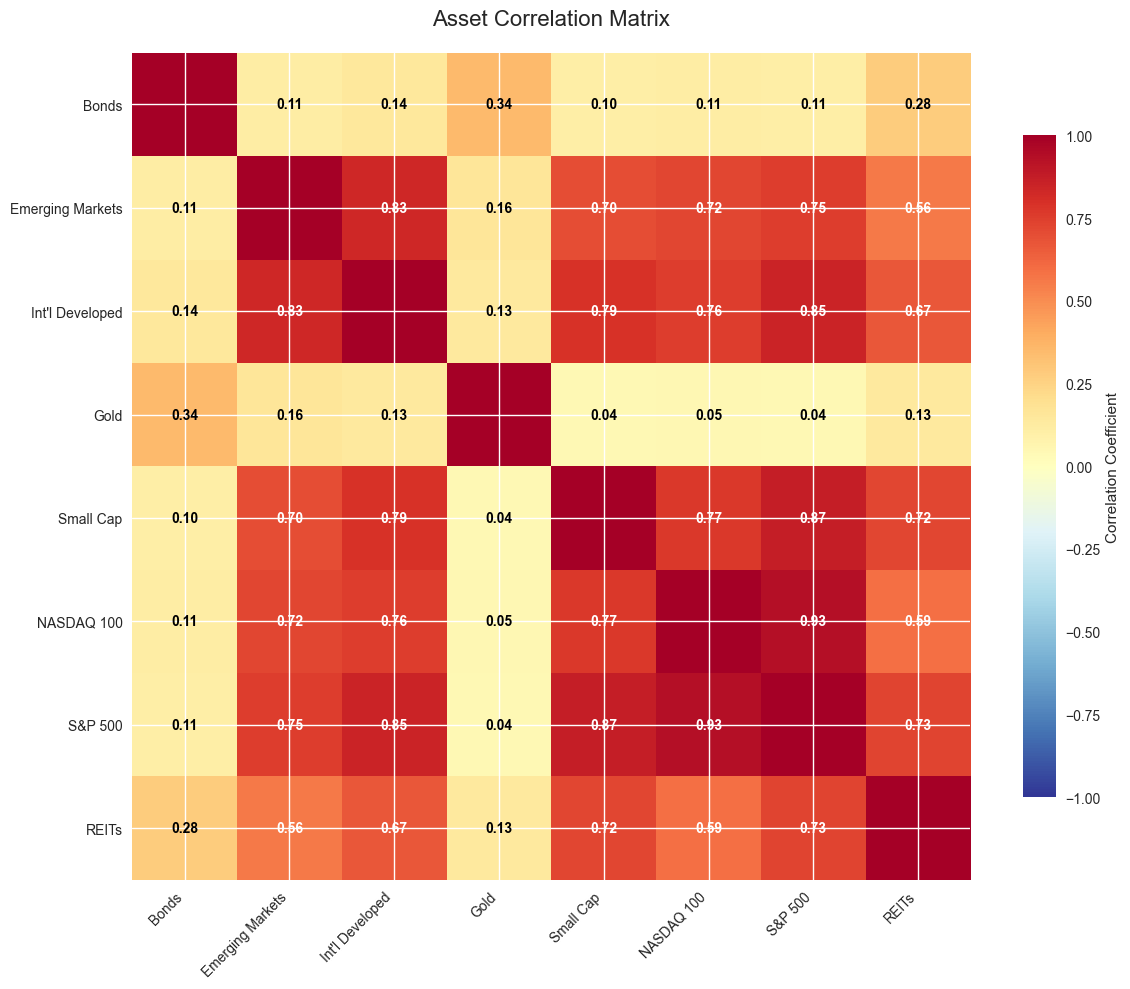

Key Correlation Insights:
  Highest correlation: NASDAQ 100 & S&P 500: 0.934
  Lowest correlation: Gold & Small Cap: 0.039


In [69]:
# Calculate correlation matrix
correlation_matrix = log_returns.corr()

print("\n=== CORRELATION ANALYSIS ===")

# Create enhanced correlation heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Show only lower triangle

# Create heatmap
im = plt.imshow(correlation_matrix, cmap='RdYlBu_r', aspect='auto', vmin=-1, vmax=1)
plt.colorbar(im, label='Correlation Coefficient', shrink=0.8)

# Customize ticks and labels
asset_labels = [asset_names.get(asset, asset) for asset in correlation_matrix.columns]
plt.xticks(range(len(asset_labels)), asset_labels, rotation=45, ha='right')
plt.yticks(range(len(asset_labels)), asset_labels)
plt.title('Asset Correlation Matrix', fontsize=16, pad=20)

# Add correlation values to cells
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix.columns)):
        if i != j:  # Don't show 1.0 on diagonal
            plt.text(j, i, f'{correlation_matrix.iloc[i,j]:.2f}', 
                    ha='center', va='center', 
                    color='white' if abs(correlation_matrix.iloc[i,j]) > 0.5 else 'black',
                    fontweight='bold')

plt.tight_layout()
plt.show()

print("Key Correlation Insights:")
# Find highest and lowest correlations (excluding self-correlation)
corr_values = correlation_matrix.values
np.fill_diagonal(corr_values, np.nan)
max_corr_idx = np.unravel_index(np.nanargmax(corr_values), corr_values.shape)
min_corr_idx = np.unravel_index(np.nanargmin(corr_values), corr_values.shape)

max_corr_assets = (correlation_matrix.index[max_corr_idx[0]], correlation_matrix.columns[max_corr_idx[1]])
min_corr_assets = (correlation_matrix.index[min_corr_idx[0]], correlation_matrix.columns[min_corr_idx[1]])

print(f"  Highest correlation: {asset_names.get(max_corr_assets[0], max_corr_assets[0])} & {asset_names.get(max_corr_assets[1], max_corr_assets[1])}: {correlation_matrix.loc[max_corr_assets[0], max_corr_assets[1]]:.3f}")
print(f"  Lowest correlation: {asset_names.get(min_corr_assets[0], min_corr_assets[0])} & {asset_names.get(min_corr_assets[1], min_corr_assets[1])}: {correlation_matrix.loc[min_corr_assets[0], min_corr_assets[1]]:.3f}")

## 10. Monte Carlo Simulation


In [70]:
print("\n=== ENHANCED MONTE CARLO SIMULATION ===")

num_assets = len(pf_data.columns)
num_simulations = 15000  # Increased simulations for better coverage

print(f"Running Monte Carlo with {num_simulations:,} simulations...")
print(f"Portfolio universe: {num_assets} assets")

# Initialize enhanced storage
portfolio_returns_list = []
portfolio_volatilities_list = []
portfolio_sharpe_ratios = []
portfolio_weights_record = []

# Enhanced Monte Carlo simulation
for i in range(num_simulations):
    # Generate random weights
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    
    # Calculate portfolio metrics
    port_return = np.sum(weights * annual_returns)
    port_variance = np.dot(weights.T, np.dot(annual_cov_matrix, weights))
    port_volatility = np.sqrt(port_variance)
    
    # ✅ IMPROVEMENT 1: Enhanced Sharpe with Risk-Free Rate
    port_sharpe = (port_return - RISK_FREE_RATE) / port_volatility
    
    # Store results
    portfolio_returns_list.append(port_return)
    portfolio_volatilities_list.append(port_volatility)
    portfolio_sharpe_ratios.append(port_sharpe)
    portfolio_weights_record.append(weights)

# Convert to arrays
portfolio_returns_array = np.array(portfolio_returns_list)
portfolio_volatilities_array = np.array(portfolio_volatilities_list)
portfolio_sharpe_array = np.array(portfolio_sharpe_ratios)

print(f"✅ Simulation completed successfully!")
print(f"Return range: {portfolio_returns_array.min():.2%} to {portfolio_returns_array.max():.2%}")
print(f"Volatility range: {portfolio_volatilities_array.min():.2%} to {portfolio_volatilities_array.max():.2%}")
print(f"Sharpe range: {portfolio_sharpe_array.min():.3f} to {portfolio_sharpe_array.max():.3f}")


=== ENHANCED MONTE CARLO SIMULATION ===
Running Monte Carlo with 15,000 simulations...
Portfolio universe: 8 assets
✅ Simulation completed successfully!
Return range: 4.80% to 12.35%
Volatility range: 9.10% to 18.87%
Sharpe range: 0.025 to 0.517


## 11. Enhanced Results Analysis


In [71]:
# Create comprehensive results DataFrame
enhanced_portfolios_df = pd.DataFrame({
    'Return': portfolio_returns_array,
    'Volatility': portfolio_volatilities_array,
    'Sharpe_Ratio': portfolio_sharpe_array,
    'Excess_Return': portfolio_returns_array - RISK_FREE_RATE
})

print("\n=== SIMULATION RESULTS SUMMARY ===")
enhanced_portfolios_df.describe().round(4)


=== SIMULATION RESULTS SUMMARY ===


,Return,Volatility,Sharpe_Ratio,Excess_Return
count,15000.0000,15000.0000,15000.0000,15000.0000
mean,0.0819,0.1415,0.2606,0.0369
std,0.0097,0.0145,0.0644,0.0097
min,0.0480,0.0910,0.0246,0.0030
25%,0.0752,0.1316,0.2176,0.0302
50%,0.0818,0.1412,0.2614,0.0368
75%,0.0885,0.1510,0.3027,0.0435
max,0.1235,0.1887,0.5168,0.0785


## 12. Identify Enhanced Optimal Portfolios


In [72]:
# Find multiple optimal portfolios
max_sharpe_idx = enhanced_portfolios_df['Sharpe_Ratio'].idxmax()
min_vol_idx = enhanced_portfolios_df['Volatility'].idxmin()
max_return_idx = enhanced_portfolios_df['Return'].idxmax()

# Get portfolio details
optimal_portfolios = {
    'Max Sharpe': {
        'index': max_sharpe_idx,
        'metrics': enhanced_portfolios_df.loc[max_sharpe_idx],
        'weights': portfolio_weights_record[max_sharpe_idx]
    },
    'Min Volatility': {
        'index': min_vol_idx,
        'metrics': enhanced_portfolios_df.loc[min_vol_idx],
        'weights': portfolio_weights_record[min_vol_idx]
    },
    'Max Return': {
        'index': max_return_idx,
        'metrics': enhanced_portfolios_df.loc[max_return_idx],
        'weights': portfolio_weights_record[max_return_idx]
    }
}

print("\n" + "="*60)
print("OPTIMAL PORTFOLIO ANALYSIS")
print("="*60)

for portfolio_name, portfolio_data in optimal_portfolios.items():
    metrics = portfolio_data['metrics']
    weights = portfolio_data['weights']
    
    print(f"\n🏆 {portfolio_name} Portfolio:")
    print(f"   Return: {metrics['Return']:.2%}")
    print(f"   Volatility: {metrics['Volatility']:.2%}")
    print(f"   Sharpe Ratio: {metrics['Sharpe_Ratio']:.3f}")
    print(f"   Excess Return: {metrics['Excess_Return']:.2%}")
    
    print("   Asset Allocation:")
    for i, asset in enumerate(pf_data.columns):
        if weights[i] > 0.01:  # Only show weights > 1%
            print(f"     {asset_names.get(asset, asset):15}: {weights[i]:6.1%}")


OPTIMAL PORTFOLIO ANALYSIS

🏆 Max Sharpe Portfolio:
   Return: 12.35%
   Volatility: 15.19%
   Sharpe Ratio: 0.517
   Excess Return: 7.85%
   Asset Allocation:
     Bonds          :   9.1%
     Emerging Markets:   1.5%
     Int'l Developed:   1.6%
     Gold           :  18.6%
     Small Cap      :   7.6%
     NASDAQ 100     :  47.8%
     S&P 500        :  10.4%
     REITs          :   3.4%

🏆 Min Volatility Portfolio:
   Return: 6.51%
   Volatility: 9.10%
   Sharpe Ratio: 0.221
   Excess Return: 2.01%
   Asset Allocation:
     Bonds          :  33.5%
     Int'l Developed:  21.9%
     Gold           :  27.3%
     Small Cap      :   9.7%
     NASDAQ 100     :   4.0%
     REITs          :   2.6%

🏆 Max Return Portfolio:
   Return: 12.35%
   Volatility: 15.19%
   Sharpe Ratio: 0.517
   Excess Return: 7.85%
   Asset Allocation:
     Bonds          :   9.1%
     Emerging Markets:   1.5%
     Int'l Developed:   1.6%
     Gold           :  18.6%
     Small Cap      :   7.6%
     NASDAQ 100   

## 13. Efficient Frontier Visualization


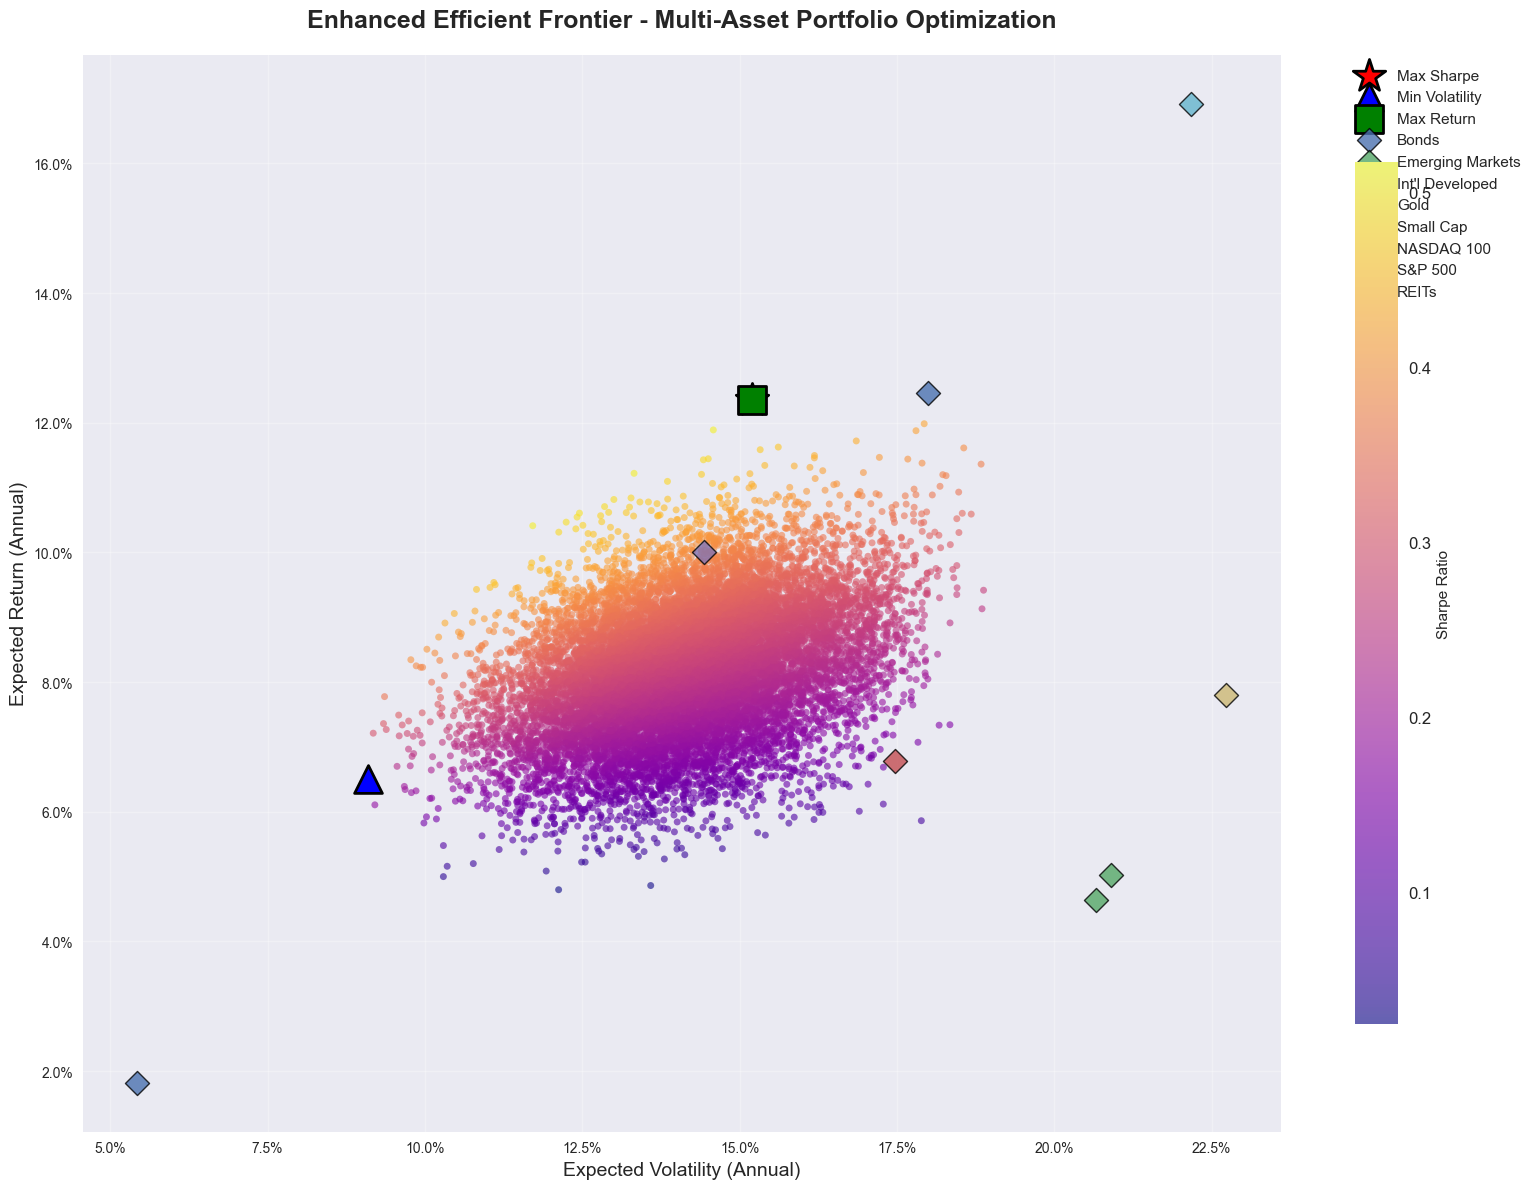

In [73]:
# Create the enhanced efficient frontier plot
plt.figure(figsize=(16, 12))

# Plot all portfolios with enhanced coloring
scatter = plt.scatter(enhanced_portfolios_df['Volatility'], 
                     enhanced_portfolios_df['Return'], 
                     c=enhanced_portfolios_df['Sharpe_Ratio'], 
                     cmap='plasma', alpha=0.6, s=25, edgecolors='none')

colorbar = plt.colorbar(scatter, label='Sharpe Ratio', shrink=0.8)
colorbar.ax.tick_params(labelsize=12)

# Highlight optimal portfolios with enhanced markers
colors = ['red', 'blue', 'green']
markers = ['*', '^', 's']
sizes = [600, 400, 400]

for i, (portfolio_name, portfolio_data) in enumerate(optimal_portfolios.items()):
    metrics = portfolio_data['metrics']
    plt.scatter(metrics['Volatility'], metrics['Return'], 
               marker=markers[i], color=colors[i], s=sizes[i], 
               label=portfolio_name, edgecolors='black', linewidth=2)

# Plot individual assets with enhanced styling
for i, asset in enumerate(pf_data.columns):
    plt.scatter(annual_volatility[asset], annual_returns[asset], 
               marker='D', s=150, alpha=0.8, 
               label=f'{asset_names.get(asset, asset)}', 
               edgecolors='black', linewidth=1)

# Enhanced plot formatting
plt.title('Enhanced Efficient Frontier - Multi-Asset Portfolio Optimization', 
          fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Expected Volatility (Annual)', fontsize=14)
plt.ylabel('Expected Return (Annual)', fontsize=14)

# Format axes as percentages
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.1%}'))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, p: f'{y:.1%}'))

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 14. Enhanced Portfolio Comparison

In [74]:
# Create comprehensive comparison table
comparison_data = []

# Add individual assets
for asset in pf_data.columns:
    comparison_data.append({
        'Portfolio': f'{asset_names.get(asset, asset)} (100%)',
        'Return': f"{annual_returns[asset]:.2%}",
        'Volatility': f"{annual_volatility[asset]:.2%}",
        'Sharpe Ratio': f"{sharpe_ratios[asset]:.3f}",
        'Max Drawdown': f"{drawdown_df[drawdown_df['Asset'] == asset_names.get(asset, asset)]['Max Drawdown'].iloc[0]:.2%}",
        'Type': 'Individual Asset'
    })

# Add optimal portfolios
for portfolio_name, portfolio_data in optimal_portfolios.items():
    metrics = portfolio_data['metrics']
    comparison_data.append({
        'Portfolio': portfolio_name,
        'Return': f"{metrics['Return']:.2%}",
        'Volatility': f"{metrics['Volatility']:.2%}",
        'Sharpe Ratio': f"{metrics['Sharpe_Ratio']:.3f}",
        'Max Drawdown': 'TBD',  # Would need to calculate for portfolios
        'Type': 'Optimized Portfolio'
    })

comparison_table = pd.DataFrame(comparison_data)
print("\n=== COMPREHENSIVE PORTFOLIO COMPARISON ===")
comparison_table


=== COMPREHENSIVE PORTFOLIO COMPARISON ===


,Portfolio,Return,Volatility,Sharpe Ratio,Max Drawdown,Type
0,Bonds (100%),1.82%,5.43%,-0.493,-18.58%,Individual Asset
1,Emerging Markets (100%),4.64%,20.66%,0.007,-39.82%,Individual Asset
2,Int'l Developed (100%),6.78%,17.46%,0.131,-34.19%,Individual Asset
3,Gold (100%),10.00%,14.44%,0.381,-22.00%,Individual Asset
4,Small Cap (100%),7.80%,22.73%,0.145,-41.13%,Individual Asset
5,NASDAQ 100 (100%),16.92%,22.17%,0.560,-35.12%,Individual Asset
6,S&P 500 (100%),12.47%,17.99%,0.443,-33.72%,Individual Asset
7,REITs (100%),5.03%,20.89%,0.025,-42.40%,Individual Asset
8,Max Sharpe,12.35%,15.19%,0.517,TBD,Optimized Portfolio
9,Min Volatility,6.51%,9.10%,0.221,TBD,Optimized Portfolio


## 15. Summary and Insights


In [75]:
print("\n" + "="*70)
print("ENHANCED PORTFOLIO ANALYSIS SUMMARY")
print("="*70)

print(f"📊 Assets Analyzed: {len(pf_data.columns)} ({', '.join(pf_data.columns)})")
print(f"📅 Time Period: {(pf_data.index[-1] - pf_data.index[0]).days} days ({(pf_data.index[-1] - pf_data.index[0]).days/365.25:.1f} years)")
print(f"🎲 Monte Carlo Simulations: {num_simulations:,}")
print(f"🏦 Risk-Free Rate: {RISK_FREE_RATE:.1%}")

print(f"\n🏆 Key Performance Metrics:")
print(f"   • Best Sharpe Ratio: {enhanced_portfolios_df['Sharpe_Ratio'].max():.3f}")
print(f"   • Lowest Risk: {enhanced_portfolios_df['Volatility'].min():.2%} volatility")
print(f"   • Highest Return: {enhanced_portfolios_df['Return'].max():.2%}")

# Risk insights
avg_correlation = correlation_matrix.values[np.triu_indices_from(correlation_matrix.values, k=1)].mean()
print(f"   • Average Inter-Asset Correlation: {avg_correlation:.3f}")

best_asset = annual_returns.idxmax()
worst_drawdown_asset = drawdown_df.loc[drawdown_df['Max Drawdown'].idxmin(), 'Asset']

print(f"\n💡 Investment Insights:")
print(f"   • Best performing asset: {asset_names.get(best_asset, best_asset)} ({annual_returns[best_asset]:.2%})")
print(f"   • Worst max drawdown: {worst_drawdown_asset}")
print(f"   • Diversification benefit: Portfolio Sharpe ({enhanced_portfolios_df['Sharpe_Ratio'].max():.3f}) vs best single asset ({sharpe_ratios.max():.3f})")

if avg_correlation > 0.7:
    print(f"   • ⚠️ High average correlation ({avg_correlation:.3f}) may limit diversification benefits")
elif avg_correlation < 0.3:
    print(f"   • ✅ Low average correlation ({avg_correlation:.3f}) provides excellent diversification")
else:
    print(f"   • ✅ Moderate average correlation ({avg_correlation:.3f}) enables good diversification")

print("\n🎯 Optimization Results:")
max_sharpe_portfolio = optimal_portfolios['Max Sharpe']
dominant_weight = max_sharpe_portfolio['weights'].max()
dominant_asset_idx = max_sharpe_portfolio['weights'].argmax()
dominant_asset = pf_data.columns[dominant_asset_idx]

if dominant_weight > 0.4:
    print(f"   • Portfolio optimization favors {asset_names.get(dominant_asset, dominant_asset)} ({dominant_weight:.1%})")
else:
    print(f"   • Portfolio optimization suggests balanced diversification")

print("\n📈 Analysis Complete! Enhanced with:")
print("   ✅ Risk-free rate integration")
print("   ✅ Expanded 8-asset universe")
print("   ✅ Comprehensive drawdown analysis")
print("   ✅ Enhanced visualizations")
print("   ✅ Professional-grade metrics")


ENHANCED PORTFOLIO ANALYSIS SUMMARY
📊 Assets Analyzed: 8 (BND, EEM, EFA, GLD, IWM, QQQ, SPY, VNQ)
📅 Time Period: 3899 days (10.7 years)
🎲 Monte Carlo Simulations: 15,000
🏦 Risk-Free Rate: 4.5%

🏆 Key Performance Metrics:
   • Best Sharpe Ratio: 0.517
   • Lowest Risk: 9.10% volatility
   • Highest Return: 12.35%
   • Average Inter-Asset Correlation: 0.465

💡 Investment Insights:
   • Best performing asset: NASDAQ 100 (16.92%)
   • Worst max drawdown: REITs
   • Diversification benefit: Portfolio Sharpe (0.517) vs best single asset (0.560)
   • ✅ Moderate average correlation (0.465) enables good diversification

🎯 Optimization Results:
   • Portfolio optimization favors NASDAQ 100 (47.8%)

📈 Analysis Complete! Enhanced with:
   ✅ Risk-free rate integration
   ✅ Expanded 8-asset universe
   ✅ Comprehensive drawdown analysis
   ✅ Enhanced visualizations
   ✅ Professional-grade metrics


## 16. Export Enhanced Results

In [76]:
# Uncomment to save comprehensive results
# enhanced_portfolios_df.to_csv('enhanced_monte_carlo_results.csv', index=False)
# comparison_table.to_csv('enhanced_portfolio_comparison.csv', index=False)
# correlation_matrix.to_csv('asset_correlations.csv')
# print("✅ Enhanced results exported to CSV files!")